In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import diff
from statsmodels.nonparametric.smoothers_lowess import lowess
import math
from matplotlib.figure import Figure

In [56]:
import glob

txtfiles = []
for file in glob.glob("Leverage Files/*_Shock Compression.txt"):
    txtfiles.append(file)
print(txtfiles)

['Leverage Files\\Forbidden dreadnought_Shock Compression.txt', 'Leverage Files\\Forbidden Druid_Shock Compression.txt', 'Leverage Files\\Ibis Ripmo 29 2019_Shock Compression.txt', 'Leverage Files\\Specilaized Turbo Levo_Shock Compression.txt', 'Leverage Files\\TransitionPatrol_Shock Compression.txt']


In [57]:
file = txtfiles[1]
bike = {
    
        'Ratio' : np.array(pd.read_csv(f'{file}', usecols=[2], delim_whitespace=' ')),
        'Position' : np.array(pd.read_csv(f'{file}', usecols=[0], delim_whitespace=' ')),
        'Shock' : np.array(pd.read_csv(f'{file}', usecols=[1], delim_whitespace=' '))
        }
    



In [72]:

position = bike['Position'].reshape(-1,)
shock = bike['Shock'].reshape(-1,)
ratio = 1/bike['Ratio'].reshape(-1,)
pro = int((((ratio[0]/ratio[-1])-1)*100)) #calculate progression from beginning to end
riderweight=75 #kg
bikeweight=14 #kg
weightbalance=0.6 #%of weight on rear wheel
rearweight = (riderweight + (bikeweight*0.8)) * weightbalance #rear sprung weight
travel = position[-1] #bike travel
stroke = shock[-1] #shock stroke

spring = 425#lb/in

In [73]:
mspring = spring * 0.175 #covert to N/mm
Force =[]
for x in shock:      #changes spring force to wheel force
    f = mspring * x
    Force.append(f)
wheel = Force / ratio

n =  (rearweight*9.81) #weight on wheel in N
sag = np.round(np.interp(n, wheel, position),1)
sagpc = np.round((sag/travel)*100, 1)               
sagratio = np.round(np.interp(sag, position, ratio))
shocksag = sag/sagratio
shocksagpc = np.round((shocksag/stroke)*100,1)
bottom = (wheel[-1]/9.81)
g=np.round(bottom/rearweight,1) #number of g's to bottom out
work=np.round(np.trapz(wheel, position/1000)) #trapezoidal integration to calculate work 

Rate = diff(wheel)/diff(position)
filtered = lowess(Rate, position[1:], frac=0.3, it=0)
filteredrate = (filtered[:,1]).reshape(-1,)
filteredposition = (filtered[:,0]).reshape(-1,)

ratechange = diff(filteredrate)/diff(filteredposition)

def natural_frequency(k, m) :
    Wo = math.sqrt(k/m)
    return Wo

freq = []
Fn = []
for x in filteredrate:
    b = natural_frequency((x*1000), rearweight)
    freq.append(b)
    Fn.append(b/6.28) 

def dampingrate(f, m, r):
    damping = 2 * r * f * m #natural freq in rad/s x weight x damping ratio
    return damping
FF = np.round(np.interp(sag, filteredposition, Fn ),1)    

dr = (0.1,0.2,0.4,0.5) #damping ratios

print('Wheelsag',sag,"mm")
print('Sag @ rear wheel =',sagpc,"%")#sag at the wheel
print('Sag @ shock =',shocksagpc,"%")
print("Bottoming Force =",int(bottom),'kg')
print('Bottoming Gs =',g,"g")
print('Work Done = ',int(work),"J")
proscore=np.mean(ratechange) * 1000
print("Progression Score =",int(proscore))
print("Progression =", pro,"%")
print("Natural Frequency @ Sag =",FF)

Wheelsag 40.7 mm
Sag @ rear wheel = 31.6 %
Sag @ shock = 35.2 %
Bottoming Force = 239 kg
Bottoming Gs = 4.6 g
Work Done =  124 J
Progression Score = 237
Progression = 43 %
Natural Frequency @ Sag = 2.7


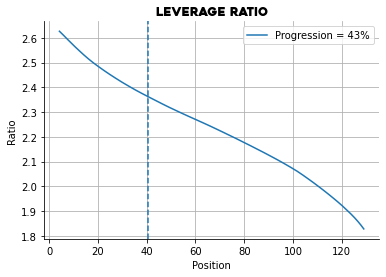

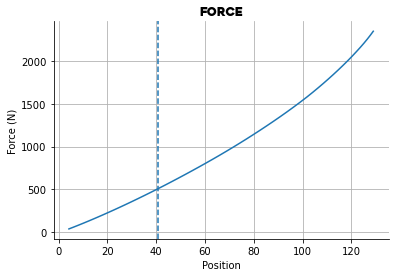

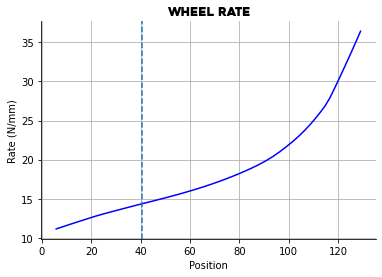

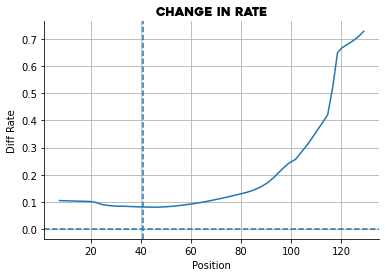

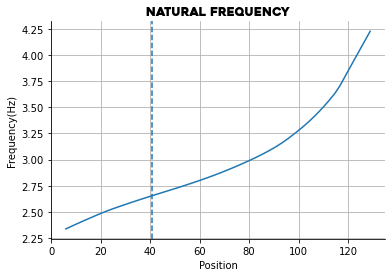

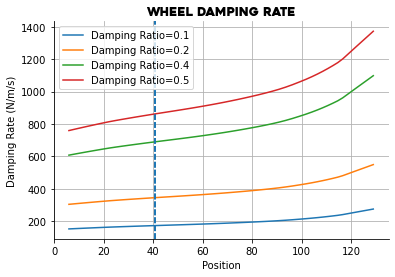

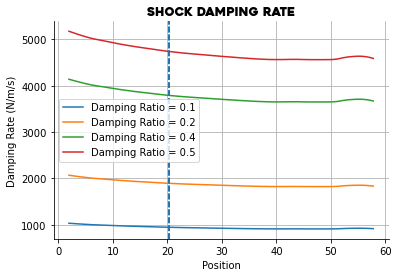

In [74]:
plt.plot(position, ratio, label =f'Progression = {pro}%')
plt.title("Leverage Ratio", fontname='Heavitas')
plt.ylabel("Ratio")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
plt.legend()
#plt.savefig('.png')
plt.axvline(x=sag, ls='--')
plt.show()






plt.plot(position, wheel)
plt.title("Force", fontname='Heavitas')
plt.ylabel("Force (N)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
#plt.legend()
#plt.savefig('.png')
plt.axvline(x=sag, ls='--')
plt.show()





plt.plot(filteredposition, filteredrate, 'b')
plt.title("Wheel Rate", fontname='Heavitas')
plt.ylabel("Rate (N/mm)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axvline(x=sag, ls='--')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
#plt.ylim(10,14)
#plt.legend()
#plt.savefig('.png')
plt.show()

#ratechange = diff(filteredrate)/diff(filteredposition)
plt.plot(filteredposition[1:], ratechange)
plt.title("Change in Rate", fontname='Heavitas')
plt.ylabel("Diff Rate")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axhline(y=0, ls='--')
plt.axvline(x=sag, ls='--')
#plt.yticks(tick)
# plt.xlim(-0.95,0.95)
# plt.ylim(200,700)
#plt.legend()
#plt.savefig('.png')
plt.show()




plt.plot(position[1:], Fn)
plt.title("Natural Frequency", fontname='Heavitas')
plt.ylabel("Frequency(Hz)")
plt.xlabel('Position')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.xscale('linear')
plt.axvline(x=sag, ls='--')
plt.show()


for dampingratio in dr:
    damprate=[]
    for f in freq:
        rate = dampingrate(f, rearweight, dampingratio)
        damprate.append(rate) # in N/m/s

    plt.plot(position[1:], damprate, label = f'Damping Ratio={dampingratio}')
    plt.title("Wheel Damping Rate", fontname='Heavitas')
    plt.ylabel("Damping Rate (N/m/s)")
    plt.xlabel('Position')
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True)
    plt.xscale('linear')
    plt.axvline(x=sag, ls='--')
plt.show()



for dampingratio in dr:
    damprate=[]
    for f in freq:
        rate = dampingrate(f, rearweight, dampingratio)
        damprate.append(rate) # in N/m/s
    shockdampingrate = damprate*(ratio[1:]**2) #N/m/s
    plt.plot(shock[1:], shockdampingrate, label =f'Damping Ratio = {dampingratio}')
    plt.title("Shock Damping Rate", fontname='Heavitas')
    plt.ylabel("Damping Rate (N/m/s)")
    plt.xlabel('Position')
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(True)
    plt.xscale('linear')
    plt.axvline(x=shocksag, ls='--')
plt.show()